# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given customer feedback given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [1]:
### YOUR CODE HERE ###

# Standard operational package imports
import pandas as pd
import numpy as np
# Important imports for modeling and evaluation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###

df_original = pd.read_csv("../data/Invistico_Airline.csv")

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use a function from the pandas library to read in the csv file.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use the `read_csv` function and pass in the file name as a string. 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pd.read_csv("insertfilenamehere")`.

</details>

### Output the first 10 rows of data

In [3]:
### YOUR CODE HERE ###
df_original.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `head()` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

If only five rows are output, it is because the function by default returns five rows. To change this, specify how many rows `(n = )` you want to output.

</details>

## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [4]:
### YOUR CODE HERE ###
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.
</details>

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [5]:
### YOUR CODE HERE ###
np.unique(df_original["Class"])

array(['Business', 'Eco', 'Eco Plus'], dtype=object)

<details>
  <summary><h4><strong> Hint 1 </strong></h4></summary>

Use the `unique()` function on the column `'Class'`.

</details>

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels. 

In [6]:
### YOUR CODE HERE ###
df_original["satisfaction"].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

<details>
  <summary><h4><strong> Hint 1</strong> </h4></summary>

Use a function from the pandas library that returns a pandas series containing counts of unique values. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

Use the `value_counts()` function. Set the `dropna` parameter passed in to this function to `False` if you want to examine how many NaN values there are. 

</details>

**Question:** How many satisfied and dissatisfied customers were there?

* There are 71087 satisfied customers and 58793 disssatisfied customer. This isn't a problematic imbalance hence there is not need to balance the data.

**Question:** What percentage of customers were satisfied? 

In [7]:
df_original["satisfaction"].value_counts(normalize=True) * 100

satisfied       54.73283
dissatisfied    45.26717
Name: satisfaction, dtype: float64

The data shows that about 55% of the customers were satisfied. This leaves about 45% dissatisfied customers. In the context of the dataset, this is a good balance for analysis. However, from a business perspective, those are a lot of dissatified customers that needs to be addressed.

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. 

In [8]:
### YOUR CODE HERE ###
# Create table for missing data analysis
def draw_missing_data_table(df: pd.DataFrame)->pd.DataFrame:
    """Compute missing data"""
    total = df.isna().sum().sort_values(ascending=False)
    percent = (df.isna().sum()/df.isna().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
    return missing_data

draw_missing_data_table(df_original)

,Total,Percent
Arrival Delay in Minutes,393,0.302587
Customer Type,0,0.000000
Departure Delay in Minutes,0,0.000000
Online boarding,0,0.000000
Cleanliness,0,0.000000
Checkin service,0,0.000000
Baggage handling,0,0.000000
Leg room service,0,0.000000
On-board service,0,0.000000
Ease of Online booking,0,0.000000


<details>
  <summary><h4><strong>Hint 1</h4></summary></strong>

Use the `isnull` function and the `sum` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isnull` function followed by the `sum` function.

</details>

**Question:** Why is it important to check how many rows and columns there are in the dataset?

It is important for several reasons:

* Data understanding: Knowing the amount of rows and columns helps with understanding the overall structure and complexity of the dataset. It provides basic overview of the amount of data avialable for analysis.
* Data integrity: Verifying the expected rows and columns in the dataset ensure data integrity
* Dimensionality reduction: Understanding the dimension of the data is crucial for dimensionality reduction techniques.
* Check for missingness in the data

### Check the number of rows and columns in the dataset

In [9]:
### YOUR CODE HERE ###
df_original.shape

(129880, 22)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `shape` attribute on the DataFrame.

</details>

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [10]:
### YOUR CODE HERE ###
df_subset = df_original.dropna(axis=0)
df_subset.shape

(129487, 22)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `dropna` function.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Set the axis parameter passed into the `dropna` function to `0` if you want to drop rows containing missing values, or `1` if you want to drop columns containing missing values. Optionally, use reset_index to avoid a SettingWithCopy warning later in the notebook. 

</details>

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [11]:
### YOUR CODE HERE ###
draw_missing_data_table(df_subset)

,Total,Percent
satisfaction,0,0.0
Customer Type,0,0.0
Departure Delay in Minutes,0,0.0
Online boarding,0,0.0
Cleanliness,0,0.0
Checkin service,0,0.0
Baggage handling,0,0.0
Leg room service,0,0.0
On-board service,0,0.0
Ease of Online booking,0,0.0


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `isna()`function and the `sum()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2</strong> </h4></summary>

To get the number of rows in the data with missing values, use the `isna()` function followed by the `sum()` function.

</details>

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [12]:
### YOUR CODE HERE ###
df_subset.shape

(129487, 22)

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [13]:
### YOUR CODE HERE #
# Explicitly assign values using .iloc
df_subset.loc[:, "Class"] = df_subset["Class"].map({"Business": 1, "Eco": 2, "Eco Plus": 3})


/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_26597/3197265587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[:, "Class"] = df_subset["Class"].map({"Business": 1, "Eco": 2, "Eco Plus": 3})
/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_26597/3197265587.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_subset.loc[:, "Class"] = df_subset["Class"].map({"Business": 1, "Eco": 2, "Eco Plus": 3})


<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` or `replace()` function. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

For both functions, you will need to pass in a dictionary of class mappings `{"Business": 3, "Eco Plus": 2, "Eco": 1})`.

</details>

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [14]:
### YOUR CODE HERE ###
df_subset.loc[:, "satisfaction"] = df_subset["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})


/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_26597/3407237636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.loc[:, "satisfaction"] = df_subset["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})
/var/folders/v2/zgr5gbws4qd_qpb553947v7h0000gn/T/ipykernel_26597/3407237636.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_subset.loc[:, "satisfaction"] = df_subset["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})


<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `map()` function to assign existing values in a column to new values.

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Call `map()` on the `satisfaction` column and pass in a dictionary specifying that `"satisfied"` should be assigned to `1` and `"dissatisfied"` should be assigned to `0`.

</details>

<details>
  <summary><h4><strong> Hint 3 </strong></h4></summary>

Update the `satisfaction` column in `df_subset` with the newly assigned values.

</details>

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [15]:
### YOUR CODE HERE ###

df_subset = pd.get_dummies(df_subset, drop_first = True)

<details>
  <summary><h4><strong> Hint 1 </strong> </h4></summary>

Use the `get_dummies()` function. 

</details>

<details>
  <summary><h4><strong> Hint 2 </strong></h4></summary>

Set the `drop_first` parameter to `True`. This removes redundant data.

</details>

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [16]:
### YOUR CODE HERE ###
df_subset.dtypes

satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer        uint8
Type of Travel_Personal Travel         uint8
dtype: obj

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `dtypes` attribute on the DataFrame.

</details>

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [17]:
### YOUR CODE HERE ###
y = df_subset["satisfaction"]
X = df_subset.copy()
X = X.drop("satisfaction", axis=1)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `train_test_split`.

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Pass in `0` to `random_state`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

If you named your features matrix X and your target y, then it would be `train_test_split(X, y, test_size=0.25, random_state=0)`.

</details>

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [18]:
### YOUR CODE HERE ###
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use `DecisionTreeClassifier`, the `fit()` function, and the `predict()` function.

</details>

**Question:** What are some advantages of using decision trees versus other models you have learned about? 

There are several advantages og using decision trees. They include:
* There are less assumptions to be concerned about when fitting decision tree. It requires no assumptions regarding the distribution of underlying data and dont require scaling of features. There is no need for additional processing, unlike the other models I have learned about.

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [40]:
### YOUR CODE HERE ###
print(f"Accuracy, {metrics.accuracy_score(y_test, dt_pred):.6}")
print(f"Precision, {metrics.precision_score(y_test, dt_pred):.6}")
print(f"recall, {metrics.recall_score(y_test, dt_pred):.6}")
print(f"f1 score, {metrics.f1_score(y_test, dt_pred):.6}")

Accuracy, 0.934666
Precision, 0.941926
recall, 0.938579
f1 score, 0.940249


<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use four different functions from `metrics` to get the accuracy, precision, recall, and F1 score.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Input `y_test` and `y_pred` into the `metrics.accuracy_score`, `metrics.precision_score`, `metrics.recall_score` and `metrics.f1_score` functions.
    
</details> 

**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

Decision tree can particularly be susceptible to overfitting. Combining hyperparameter tuning and grid search can help ensure this doesn't become a problem. For example setting an appropiate value for max depth could potentially help reduce a decision tree's overfitting problem by limiting how deep the tree can grow.

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

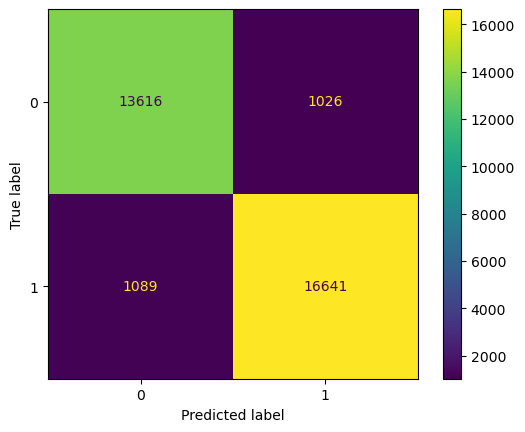

In [20]:
### YOUR CODE HERE ###
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot();

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about plotting a confusion matrix](https://www.coursera.org/learn/regression-analysis-simplify-complex-data-relationships/lecture/SpRqe/evaluate-a-binomial-logistic-regression-model).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `metrics.confusion_matrix`, `metrics.ConfusionMatrixDisplay`, and the `plot()` function.

</details>

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

In the confusion matrix, there are high proportion of true positive and true negatives (where the matrix accurately predicted that the customer would be satisfied or dissatified respectively.)

The model also have a low value of false negative and false positve (where the matrix inaccurately predicted that the customer would be satisfied or dissatisfied, respectively)

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

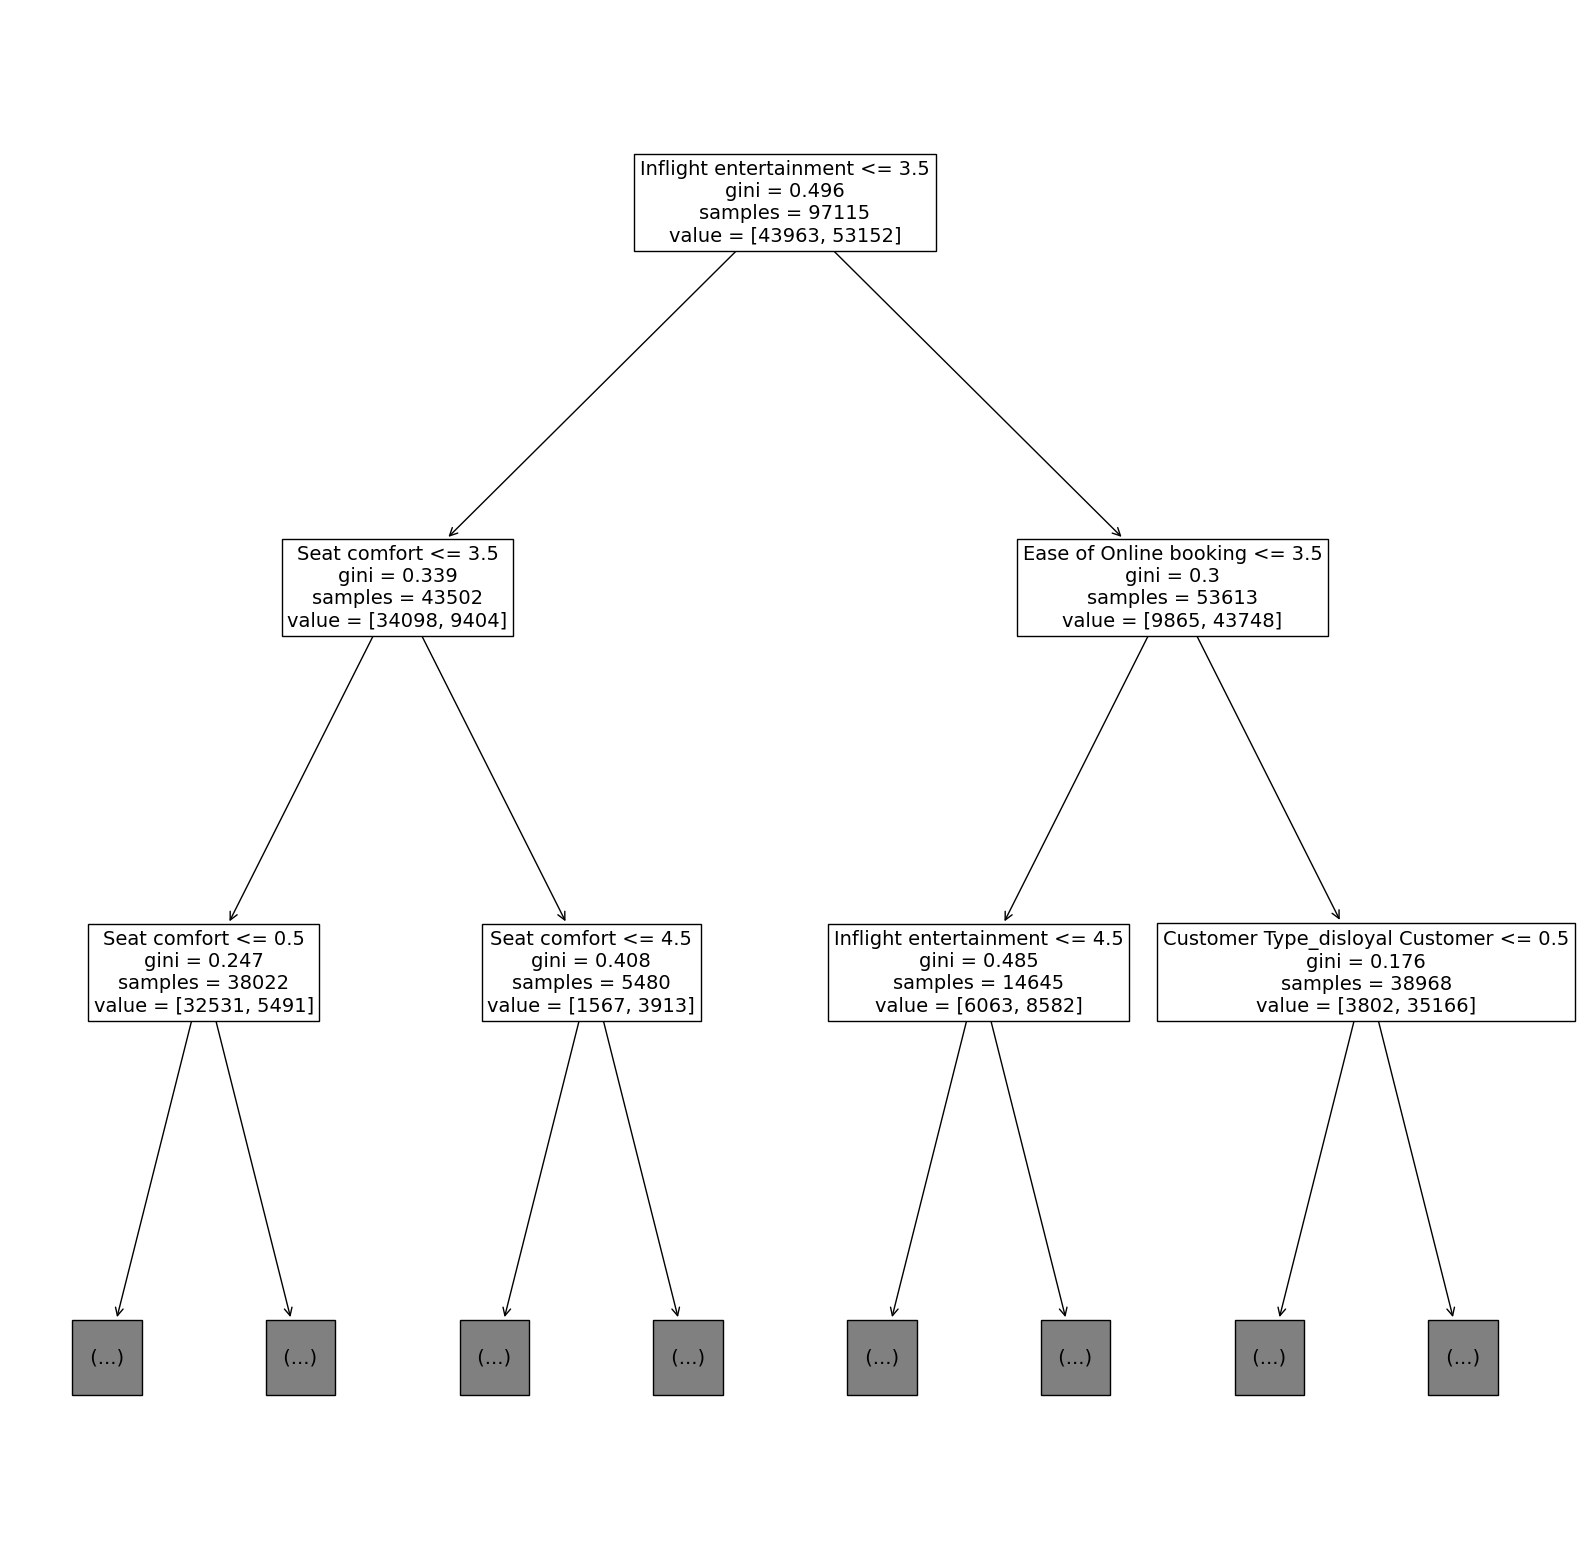

In [21]:
### YOUR CODE HERE ###
plt.figure(figsize=(20,20))
plot_tree(decision_tree, max_depth=2, fontsize=14, feature_names=X.columns);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

If your tree is hard to read, pass `2` or `3` in the parameter `max_depth`. 

</details>

### Calculate feature importance

The `DecisionTreeClassifier` class comes with a [`feature_importance `](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)attribute that provides access to the features' relative importance in the model. The feature importance are computed when the `fit()` method is called on the `DecisionTreeClassifier` instance. In other words, its information that is generated during model training.

For each feature used in the tree, the algorithm finds all the decision nodes that uses that particular feature as the split criterion. Then for each of those decision nodes it compures the decrease in Gini inpurity that results from that split. Then the algorithm sums up the decreases across all the decisions made using that feature and expresses it as percentage of the total decrease that that resulted from all features.

<Axes: >

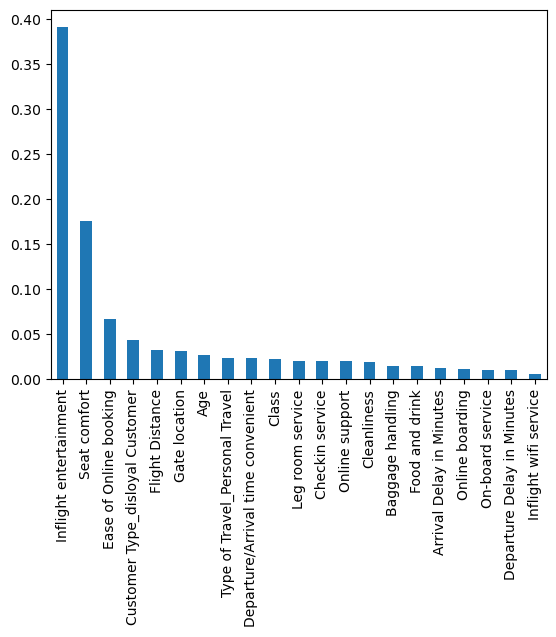

In [22]:
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)

The feature importnace graph seems to confirm that `Inflight entertainment`, `Seat comfort` and `Ease of Online booking` are the most import for this model.

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [23]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

In [26]:
### YOUR CODE HERE ###
tuned_decision_tree = DecisionTreeClassifier(random_state=0)

clf = GridSearchCV(tuned_decision_tree,
                  tree_para,
                  scoring=scoring,
                  cv=3,
                  refit="f1")

clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring={'recall', 'accuracy', 'precision', 'f1'})

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about decision trees and grid search](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree). 

</details>

<details>
  <summary><h4><strong> Hint 2</strong></h4></summary>

Use `DecisionTreeClassifier()`, `GridSearchCV()`, and the `clf.fit()` function.

</details>

**Question:** How can you determine the best combination of values for the hyperparameters? 

Use the best estimator tool to help uncover the best pair combination.

### Compute the best combination of values for the hyperparameters

In [28]:
### YOUR CODE HERE ###
clf.best_estimator_

DecisionTreeClassifier(max_depth=16, min_samples_leaf=3, random_state=0)

<details>
  <summary><h4><strong> Hint 1</strong></h4></summary>

Use the `best_estimator_` attribute.

</details>

**Question:** What is the best combination of values for the hyperparameters? 

After running the DecisionTreeClassifier, the maximum depth is 16 and the minimum number of sample is three, meaning this the best combination of values

<strong> Question: What was the best average validation score? </strong>

In [30]:
### YOUR CODE HERE ###
print(f"Best average validation score: {clf.best_score_:.4}")

Best average validation score: 0.9428


The best average score is 0.9428

<details>
  <summary><h4><strong>Hint 1</strong> </h4></summary>

Use the `.best_score_` attribute.

</details>

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [39]:
### YOUR CODE HERE

results = pd.DataFrame(columns=["Model", "F1", "Recall", "Precision", "Accuracy"])

def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results["mean_test_f1"].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({"Model" : [model_name],
                         "F1": [f1],
                         "Recall": [recall],
                         "Precision": [precision],
                         "Accuracy": [accuracy]})
    return table

result_table = make_results("Tuned Decision Tree", clf)
result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.942774,0.93528,0.950399,0.937857


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Get all the results (`.cv_results_`) from the GridSearchCV instance (`clf`).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Output `mean_test_f1`, `mean_test_recall`, `mean_test_precision`, and `mean_test_accuracy` from `clf.cv_results_`.
</details>

**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

The F1 score for the decision tree that was not hyperparameter tuned is 0.940940 and the F1 score for the hyperparameter tuned decision tree is 0.942774. While ensuring that overfitting doesn't occure is necessary for some model, it didn't make a meaningful differnece in improving this model.

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

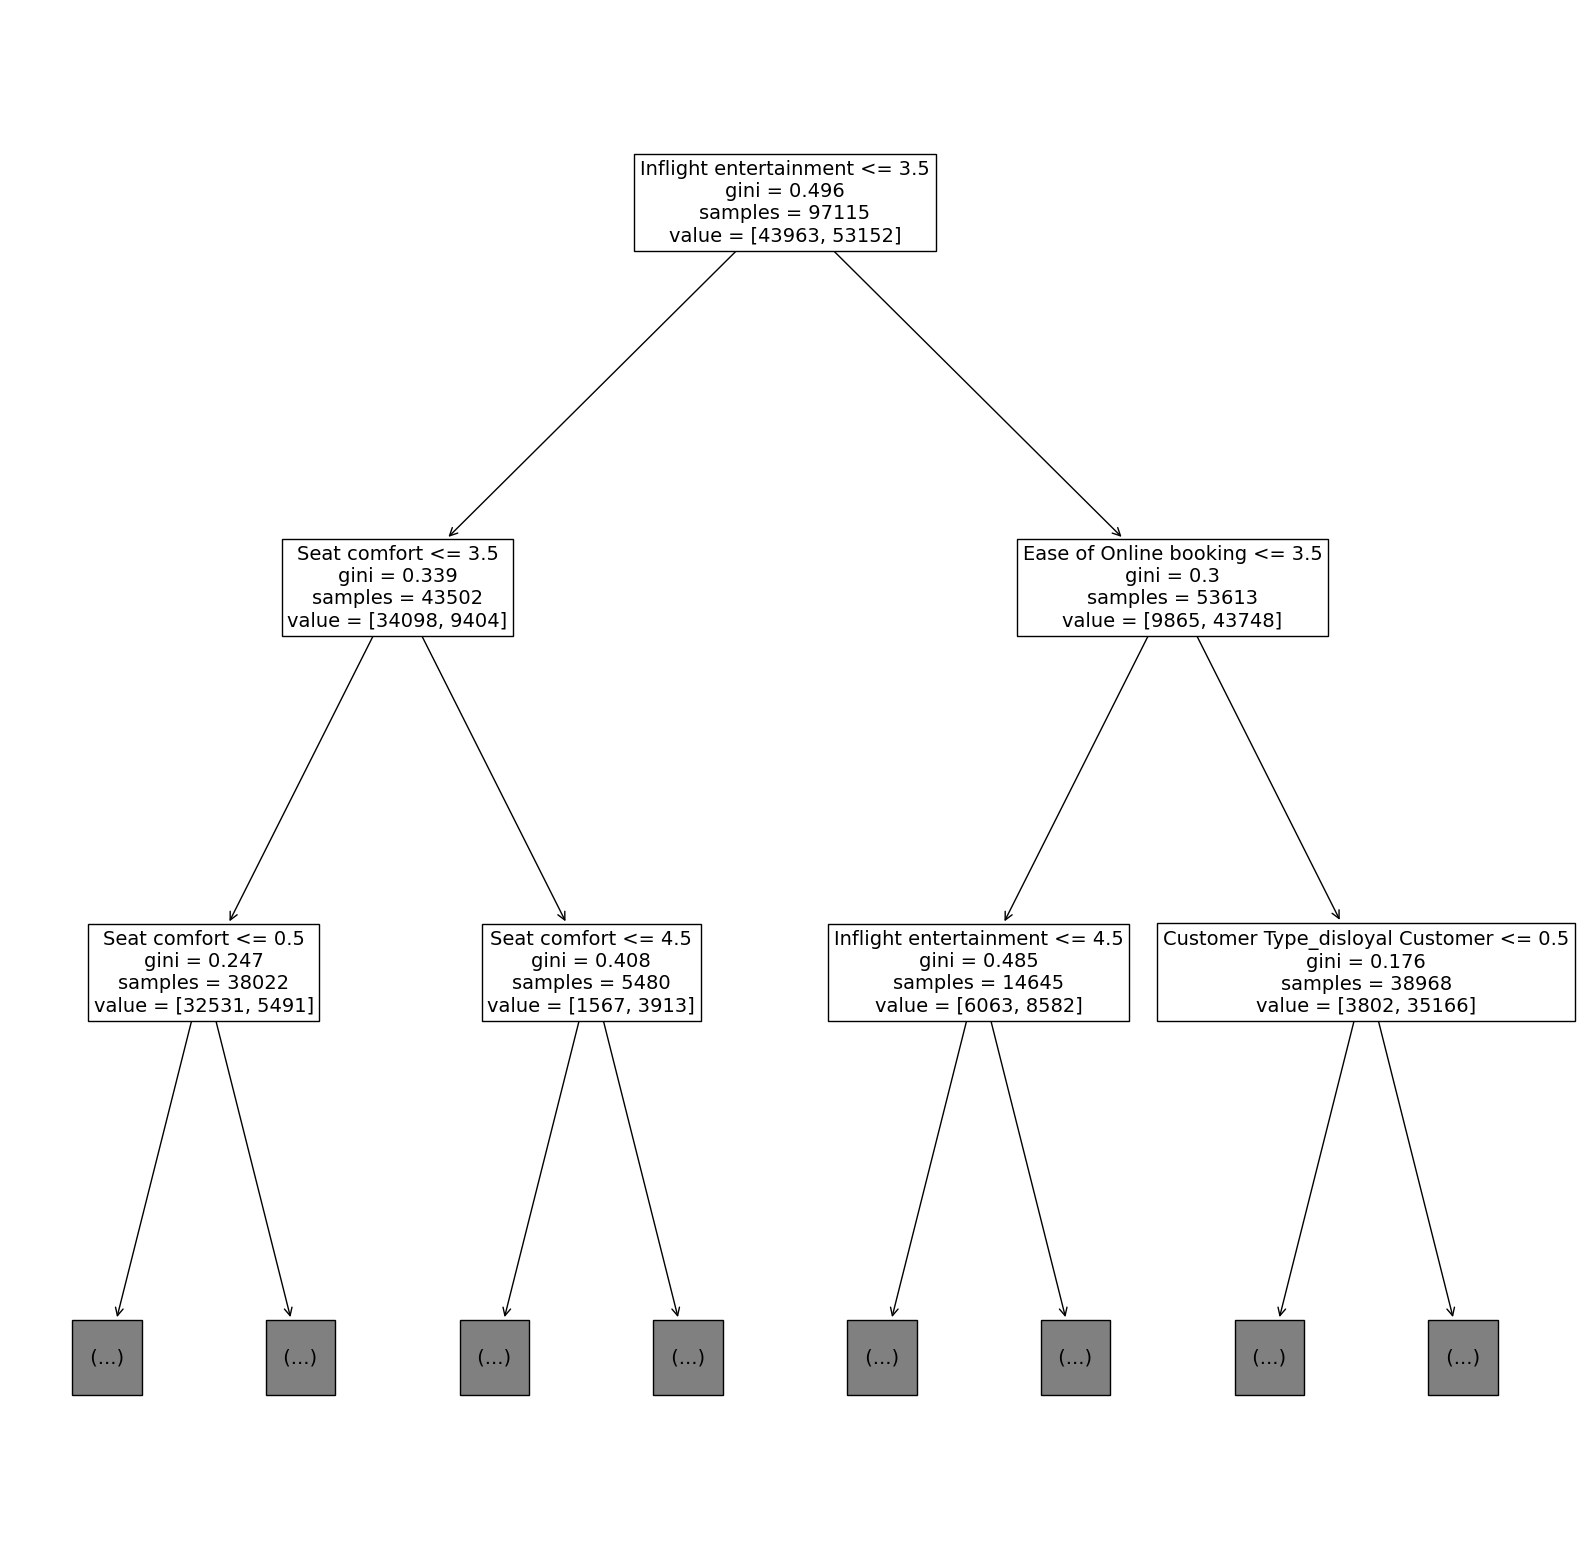

In [42]:
### YOUR CODE HERE ###
plt.figure(figsize=(20,20))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns);

Which features did the model use first to sort the samples?

The plot makes it seem like `Inflight entertainment`, `Seat comfort` and `Ease of Online booking` are among the most important features.

**Question:** What do you think is the most important metric in this business case?

Any of the metrics in this business case could be considered important, depending on what the stakeholder or domain expert cares about. The following are reason why each metric is important:

* Accuracy tends to be the metric that the stakeholders can best understand.
* Precision measures what proportion of predicted positives is truly positive. For example if you wanted to not falsely claiming a customer is satisfied, precision would be a good metric. Assuming a customer is happy when they are really not might lead to customer churn.
* Recall measures the percentage of actual positves a model correctly identified. For this dataset, the airline might want to limit false negatives (actually satisfied people who are predicted to be unsatisfied). Assuming a customer is unhappy when the customer is happy can lead to the airline wasting resources trying to improve the customer experience of an already happy customer.
* F1 balances precision and recall. It is the harmonic mean of precision and recall.

## Conclusion

**What are some key takeaways that you learned from this lab?**
*   Machine learning workflows may be used to clean and encode data for machine learning.
*   While hyperparameter tuning can lead to an increase in performance, it doesn't always. 
*   The visualization of the decision tree as well as the feature graph can be used to determine which features are most important for a decision tree.


**What findings would you share with others?**
*   Decision trees accurately predicted satisfaction over 94 percent of the time.  
*   The confusion matrix is useful as it shows a similar number of true positives and true negatives. 
*   The visualization of the decision tree and the feature importance graph both suggest that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features in the model.

**What would you recommend to stakeholders?**
*  Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. Improving these experiences should lead to better customer satisfaction. 
*  The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged